In [1]:
import librosa
from matplotlib import pyplot as plt

from ttsxai.utils import plot_utils, jupyter_utils

In [7]:
# To enable the always_reload feature
jupyter_utils.register_always_reload(packages=['ttsxai'])

hi


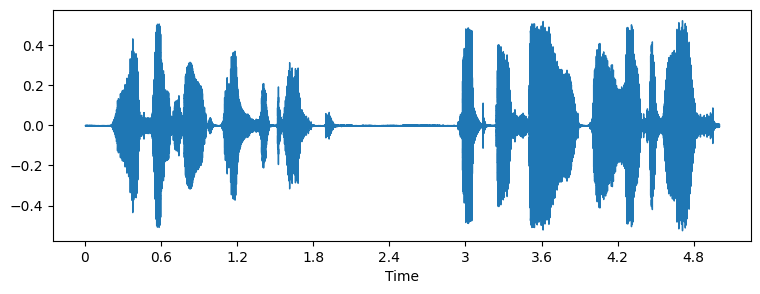

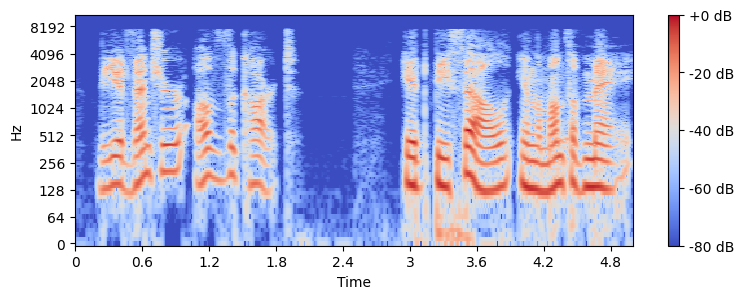

In [4]:
audio, sr = librosa.load(librosa.ex('libri2'), duration=5)

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_audio(audio, sr=sr, ax=ax)

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(audio, sr=sr, spec_type='spectrogram', ax=ax)

In [7]:
from ttsxai.dev.pitch_calculator import Parselmouth
from ttsxai.dev.audio_preprocessor import AudioPreprocessor

In [8]:
parsel = Parselmouth(reduction_factor=1, fs=16000)
ap = AudioPreprocessor(input_sr=16000, output_sr=16000, melspec_buckets=80, hop_length=256, n_fft=1024, cut_silence=False)
if ap.sr != sr:
    print('new')
    ap = AudioPreprocessor(input_sr=sr, output_sr=16000, melspec_buckets=80, hop_length=256, n_fft=1024, cut_silence=False)

new


In [9]:
norm_wave = ap.audio_to_wave_tensor(normalize=True, audio=audio)

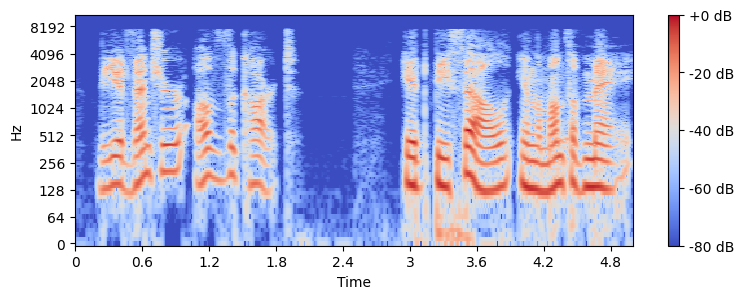

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(audio, sr=sr, spec_type='spectrogram', ax=ax)

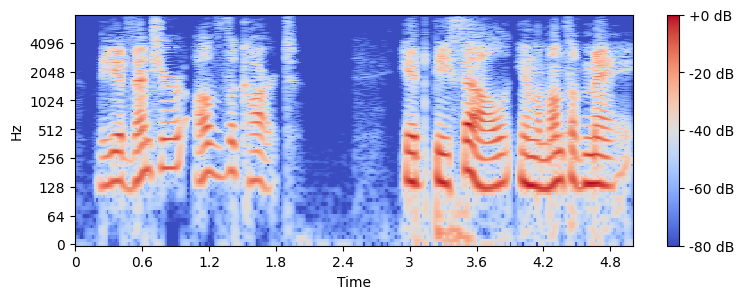

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(norm_wave.cpu().numpy(), sr=16000, spec_type='spectrogram', ax=ax)

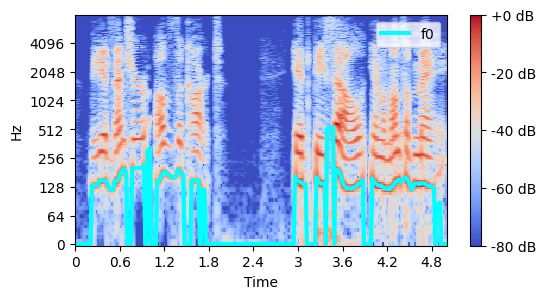

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

f0 = parsel._calculate_f0(norm_wave)
f0.shape
f0 = parsel._adjust_num_frames(f0, 313).view(-1)
f0 = f0.cpu().numpy()

plot_utils.plot_spectrogram(norm_wave.cpu().numpy(), sr=16000, spec_type='spectrogram', ax=ax,
    f0=f0)

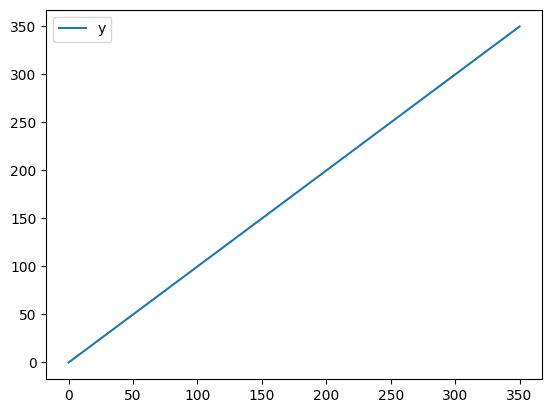

In [75]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(351), label='y')
ax.legend()


In [66]:
f0 = parsel._calculate_f0(norm_wave)
f0.shape
f0 = parsel._adjust_num_frames(f0, 313).view(-1)
f0 = f0.cpu().numpy()
f0.shape
# plt.plot(f0)

torch.Size([313])

In [28]:
norm_wave

tensor([ 6.3195e-06, -3.5701e-05, -4.4853e-04,  ...,  6.6812e-03,
         4.5380e-03,  3.5170e-03])